In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df1 = pd.read_csv("C:/Users/thinkpad/OneDrive/Bureau/real_estate_agent.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              70000 non-null  object 
 1   region_type           70000 non-null  object 
 2   property_type         70000 non-null  object 
 3   year_built            70000 non-null  int64  
 4   condition             70000 non-null  object 
 5   furnishing            70000 non-null  object 
 6   bedrooms              70000 non-null  int64  
 7   bathrooms             70000 non-null  object 
 8   stories               70000 non-null  int64  
 9   parking               70000 non-null  int64  
 10  garden                70000 non-null  bool   
 11  lot_area_sqft         70000 non-null  float64
 12  floor_area_sqft       70000 non-null  float64
 13  price_usd             70000 non-null  float64
 14  property_tax_usd      70000 non-null  float64
 15  insurance_usd      

In [4]:
df1['annual_expenses'] = df1['property_tax_usd'] + df1['insurance_usd'] + df1['maintenance_usd']
df1['annual_net_rent'] = df1['rent_usd_month'] * 12 - df1['annual_expenses']
df1['years_to_profit'] = df1['price_usd'] / df1['annual_net_rent']


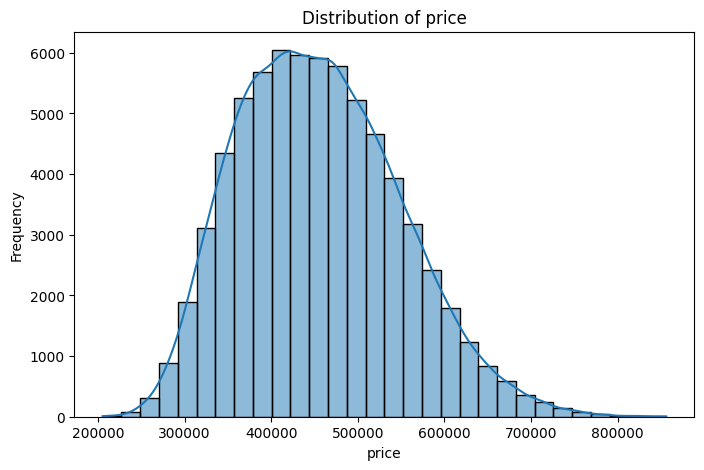

In [6]:
# Visualize the distribution of prices column
plt.figure(figsize=(8, 5))
sns.histplot(df1['price_usd'], kde=True, bins=30)
plt.title('Distribution of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

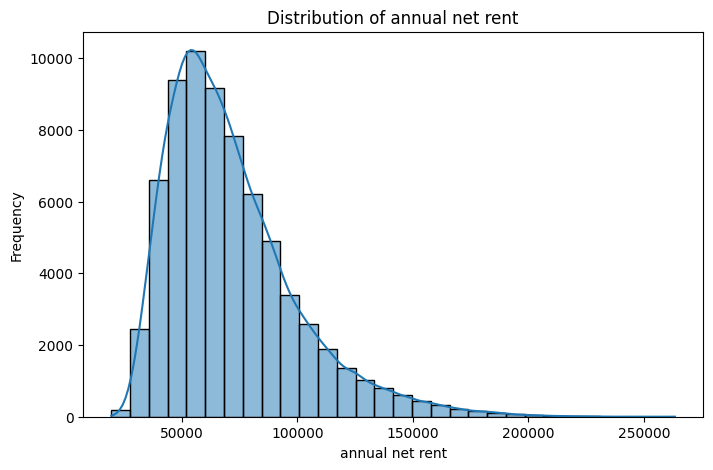

In [7]:
# Visualize the distribution of the annual rent column
plt.figure(figsize=(8, 5))
sns.histplot(df1['annual_net_rent'], kde=True, bins=30)
plt.title('Distribution of annual net rent')
plt.xlabel('annual net rent')
plt.ylabel('Frequency')
plt.show()

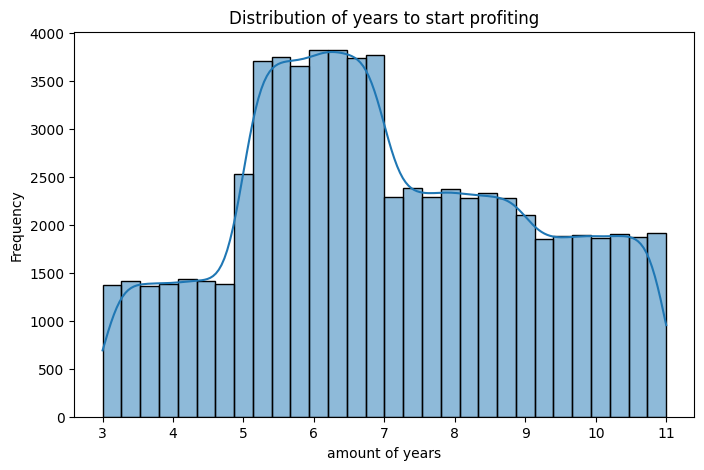

In [8]:
# Visualize the distribution of years to profit column
plt.figure(figsize=(8, 5))
sns.histplot(df1['years_to_profit'], kde=True, bins=30)
plt.title('Distribution of years to start profiting')
plt.xlabel('amount of years')
plt.ylabel('Frequency')
plt.show()

C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17416\1484895985.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df1, x='location', y='price_usd', estimator=np.mean, ci=None, palette='Set3')
C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17416\1484895985.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df1, x='location', y='price_usd', estimator=np.mean, ci=None, palette='Set3')


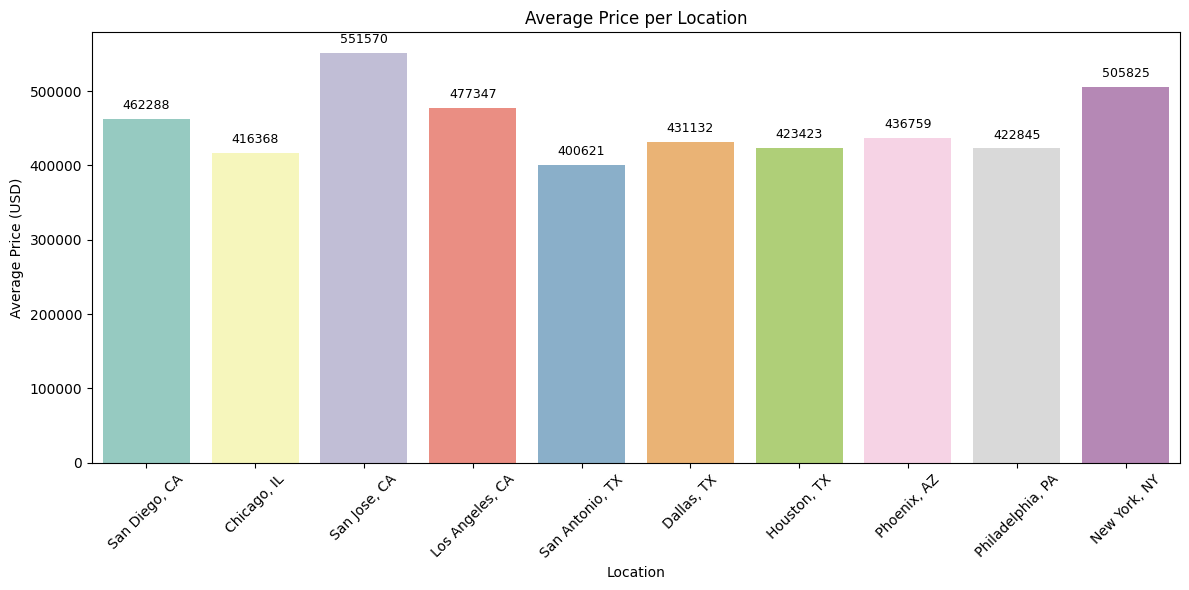

C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17416\1484895985.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df1, x='region_type', y='price_usd', estimator=np.mean, ci=None, palette='Pastel1')
C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17416\1484895985.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df1, x='region_type', y='price_usd', estimator=np.mean, ci=None, palette='Pastel1')


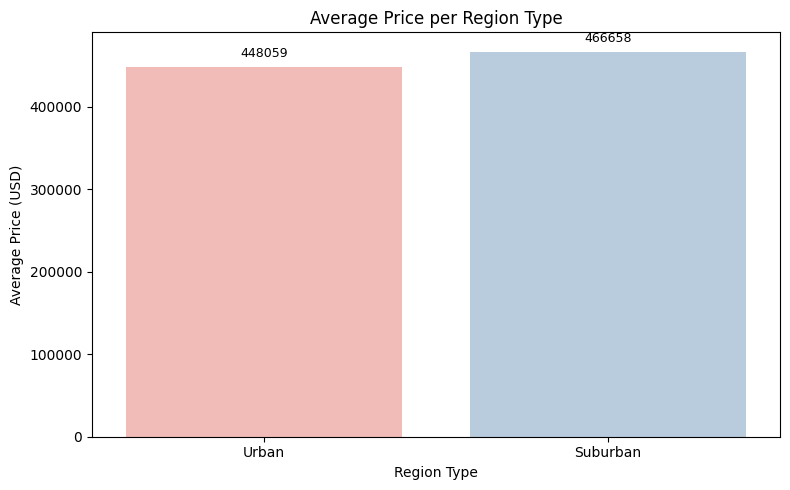

C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17416\1484895985.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df1, x='property_type', y='price_usd', estimator=np.mean, ci=None, palette='Set2')
C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17416\1484895985.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df1, x='property_type', y='price_usd', estimator=np.mean, ci=None, palette='Set2')


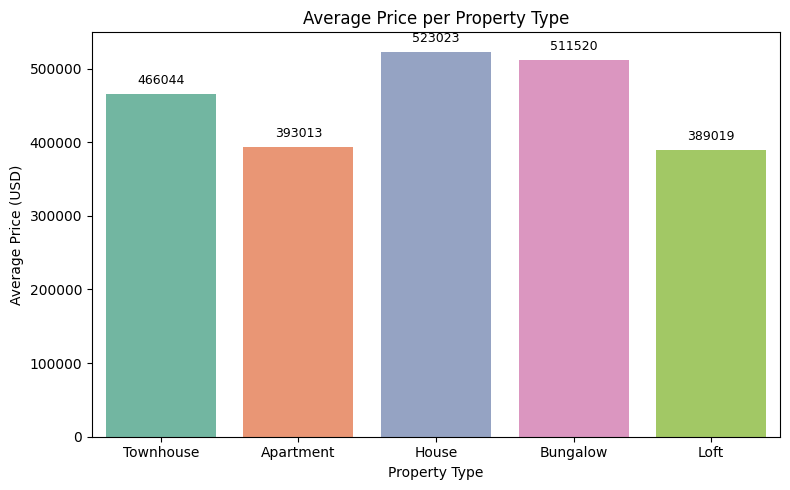

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Average price per location with color palette
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df1, x='location', y='price_usd', estimator=np.mean, ci=None, palette='Set3')
plt.title('Average Price per Location')
plt.ylabel('Average Price (USD)')
plt.xlabel('Location')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average price per region type with color palette
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df1, x='region_type', y='price_usd', estimator=np.mean, ci=None, palette='Pastel1')
plt.title('Average Price per Region Type')
plt.ylabel('Average Price (USD)')
plt.xlabel('Region Type')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

# Average price per property type with color palette
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df1, x='property_type', y='price_usd', estimator=np.mean, ci=None, palette='Set2')
plt.title('Average Price per Property Type')
plt.ylabel('Average Price (USD)')
plt.xlabel('Property Type')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()


C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17416\2038134218.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df1, x='location', y='annual_net_rent', estimator=np.mean, ci=None, palette='Set3')
C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17416\2038134218.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df1, x='location', y='annual_net_rent', estimator=np.mean, ci=None, palette='Set3')


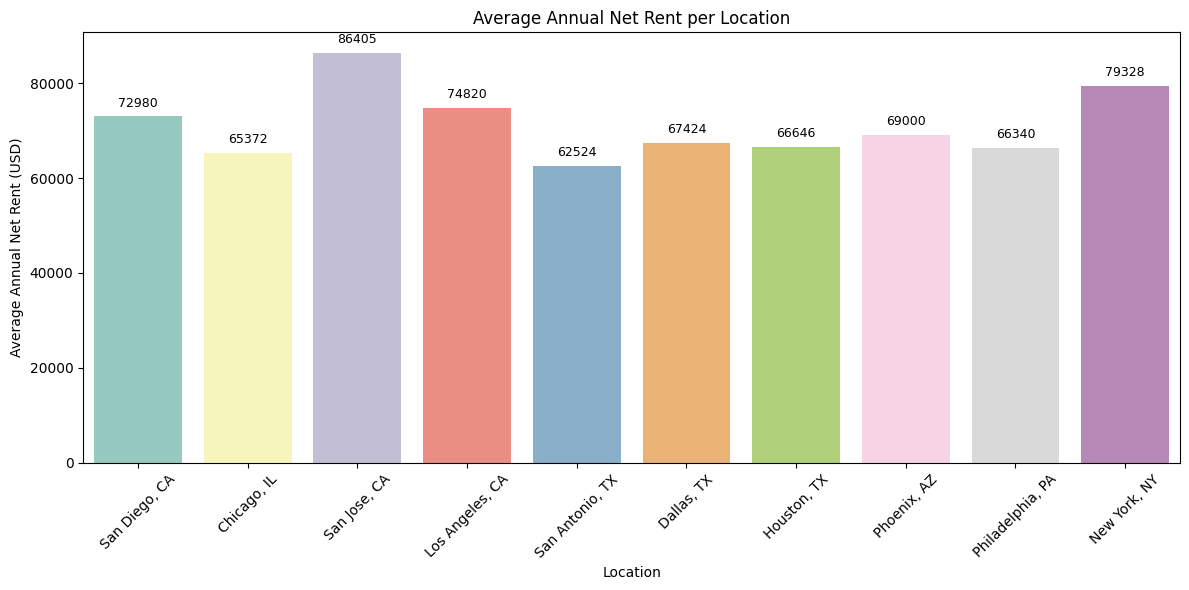

C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17416\2038134218.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df1, x='region_type', y='annual_net_rent', estimator=np.mean, ci=None, palette='Pastel1')
C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17416\2038134218.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df1, x='region_type', y='annual_net_rent', estimator=np.mean, ci=None, palette='Pastel1')


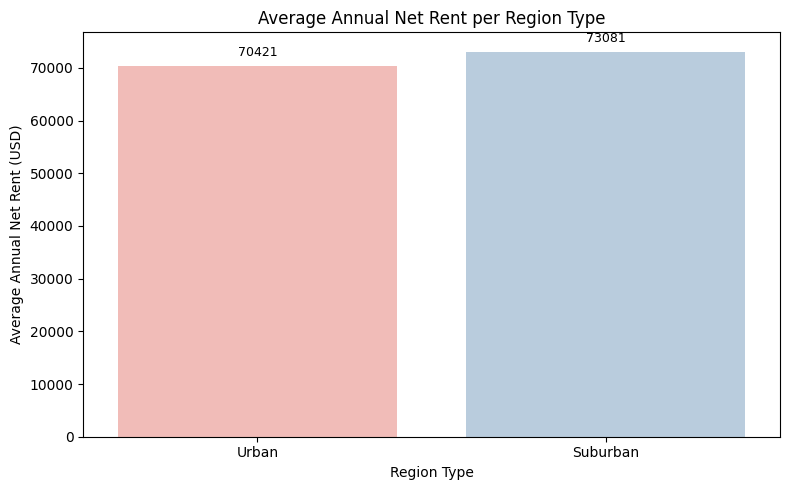

C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17416\2038134218.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df1, x='property_type', y='annual_net_rent', estimator=np.mean, ci=None, palette='Set2')
C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17416\2038134218.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df1, x='property_type', y='annual_net_rent', estimator=np.mean, ci=None, palette='Set2')


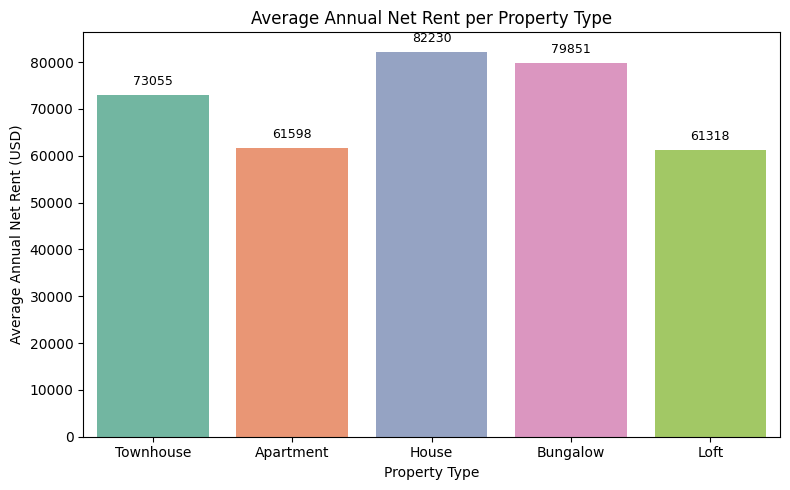

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Average annual net rent per location with color palette
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df1, x='location', y='annual_net_rent', estimator=np.mean, ci=None, palette='Set3')
plt.title('Average Annual Net Rent per Location')
plt.ylabel('Average Annual Net Rent (USD)')
plt.xlabel('Location')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average annual net rent per region type with color palette
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df1, x='region_type', y='annual_net_rent', estimator=np.mean, ci=None, palette='Pastel1')
plt.title('Average Annual Net Rent per Region Type')
plt.ylabel('Average Annual Net Rent (USD)')
plt.xlabel('Region Type')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

# Average annual net rent per property type with color palette
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df1, x='property_type', y='annual_net_rent', estimator=np.mean, ci=None, palette='Set2')
plt.title('Average Annual Net Rent per Property Type')
plt.ylabel('Average Annual Net Rent (USD)')
plt.xlabel('Property Type')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()


C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17416\3540629449.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df1, x='location', y='years_to_profit', estimator=np.mean, ci=None, palette='Set3')
C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17416\3540629449.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df1, x='location', y='years_to_profit', estimator=np.mean, ci=None, palette='Set3')


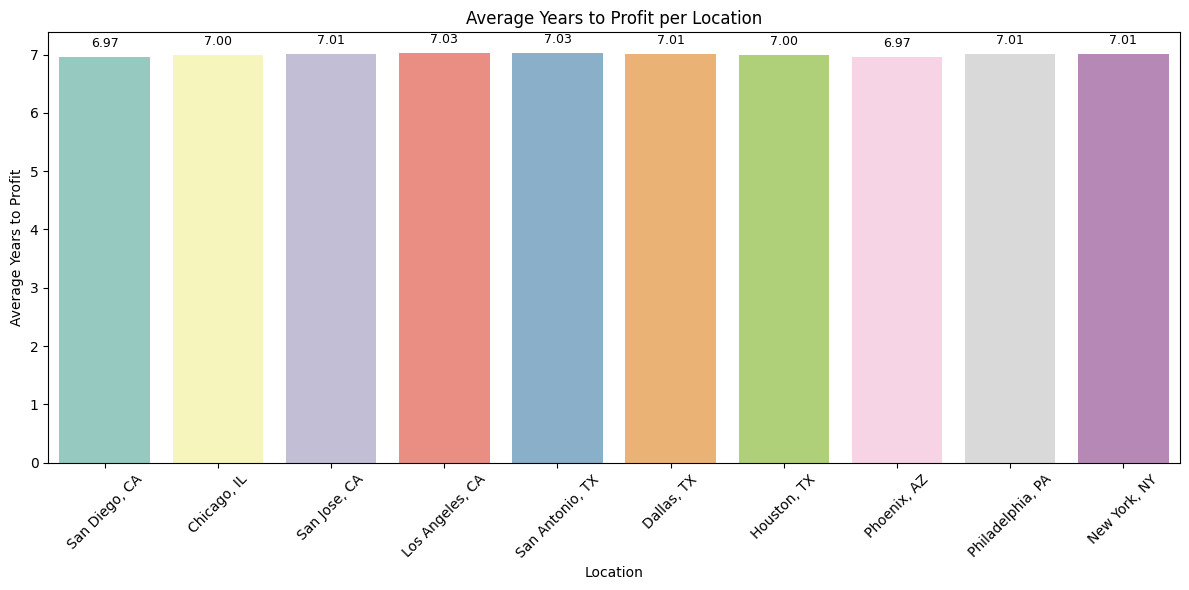

C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17416\3540629449.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df1, x='region_type', y='years_to_profit', estimator=np.mean, ci=None, palette='Pastel1')
C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17416\3540629449.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df1, x='region_type', y='years_to_profit', estimator=np.mean, ci=None, palette='Pastel1')


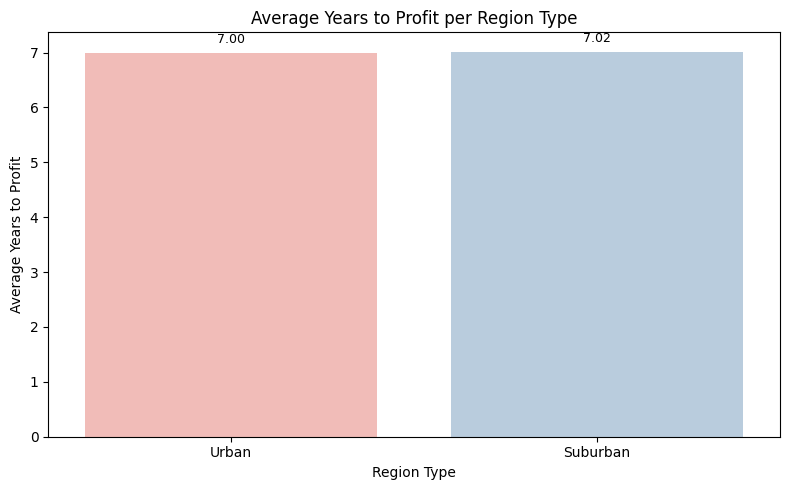

C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17416\3540629449.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df1, x='property_type', y='years_to_profit', estimator=np.mean, ci=None, palette='Set2')
C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17416\3540629449.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df1, x='property_type', y='years_to_profit', estimator=np.mean, ci=None, palette='Set2')


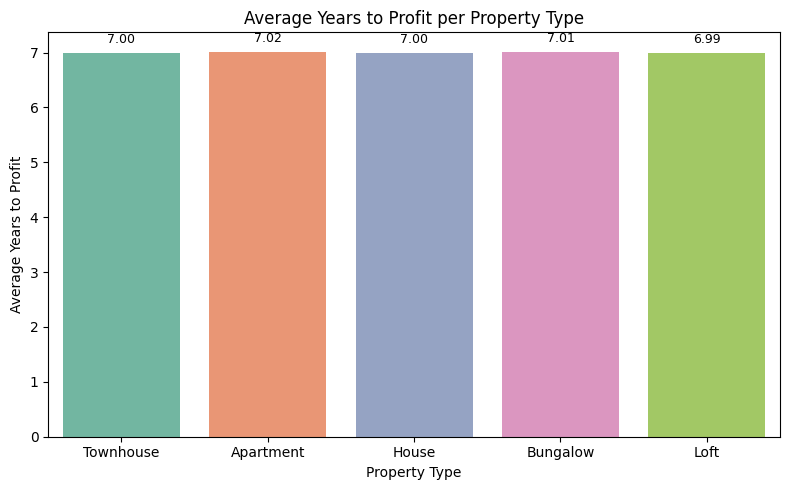

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Average years to profit per location with color palette
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df1, x='location', y='years_to_profit', estimator=np.mean, ci=None, palette='Set3')
plt.title('Average Years to Profit per Location')
plt.ylabel('Average Years to Profit')
plt.xlabel('Location')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average years to profit per region type with color palette
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df1, x='region_type', y='years_to_profit', estimator=np.mean, ci=None, palette='Pastel1')
plt.title('Average Years to Profit per Region Type')
plt.ylabel('Average Years to Profit')
plt.xlabel('Region Type')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

# Average years to profit per property type with color palette
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df1, x='property_type', y='years_to_profit', estimator=np.mean, ci=None, palette='Set2')
plt.title('Average Years to Profit per Property Type')
plt.ylabel('Average Years to Profit')
plt.xlabel('Property Type')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()


<Axes: >

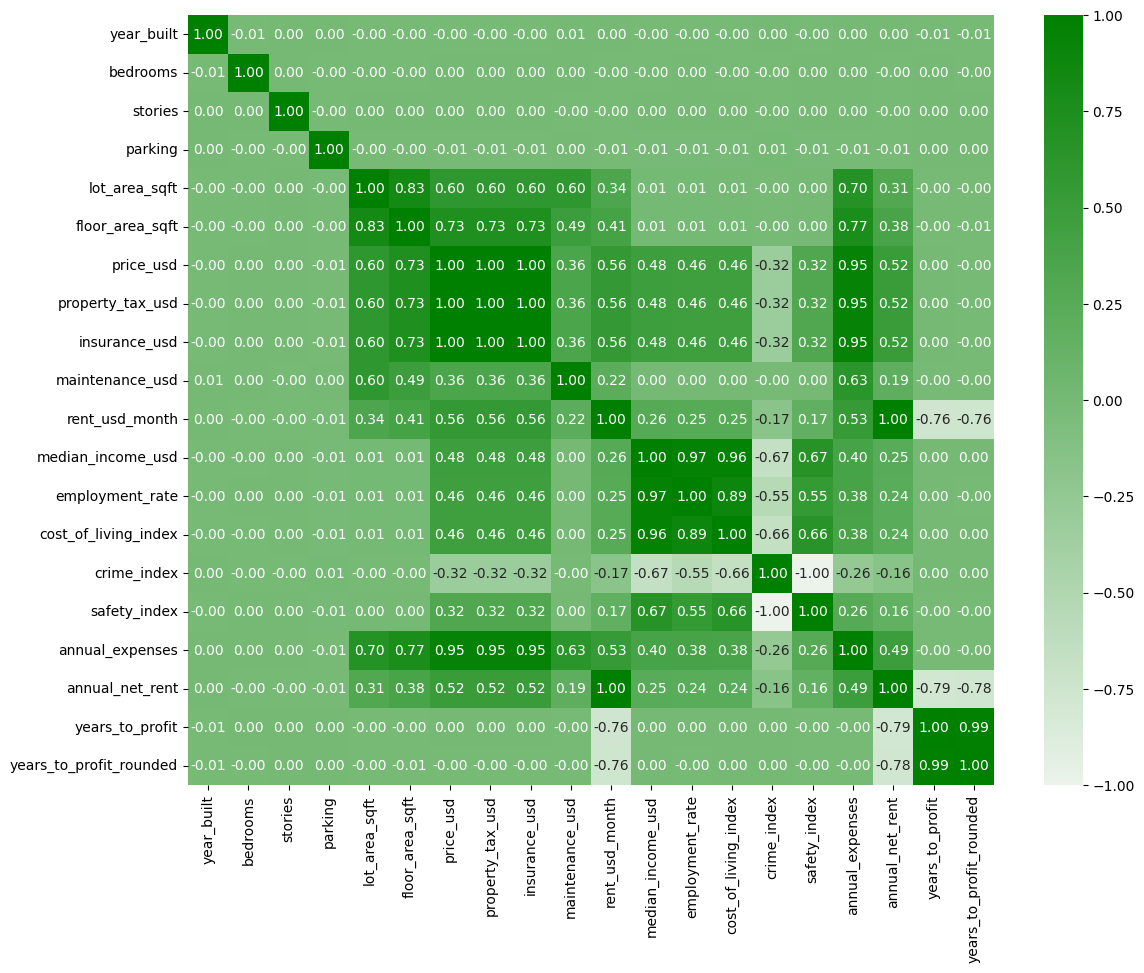

In [24]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [13, 10]
df_numeric = df1.select_dtypes(include=['int64', 'float64'])
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap=sns.light_palette("green", as_cmap=True))   

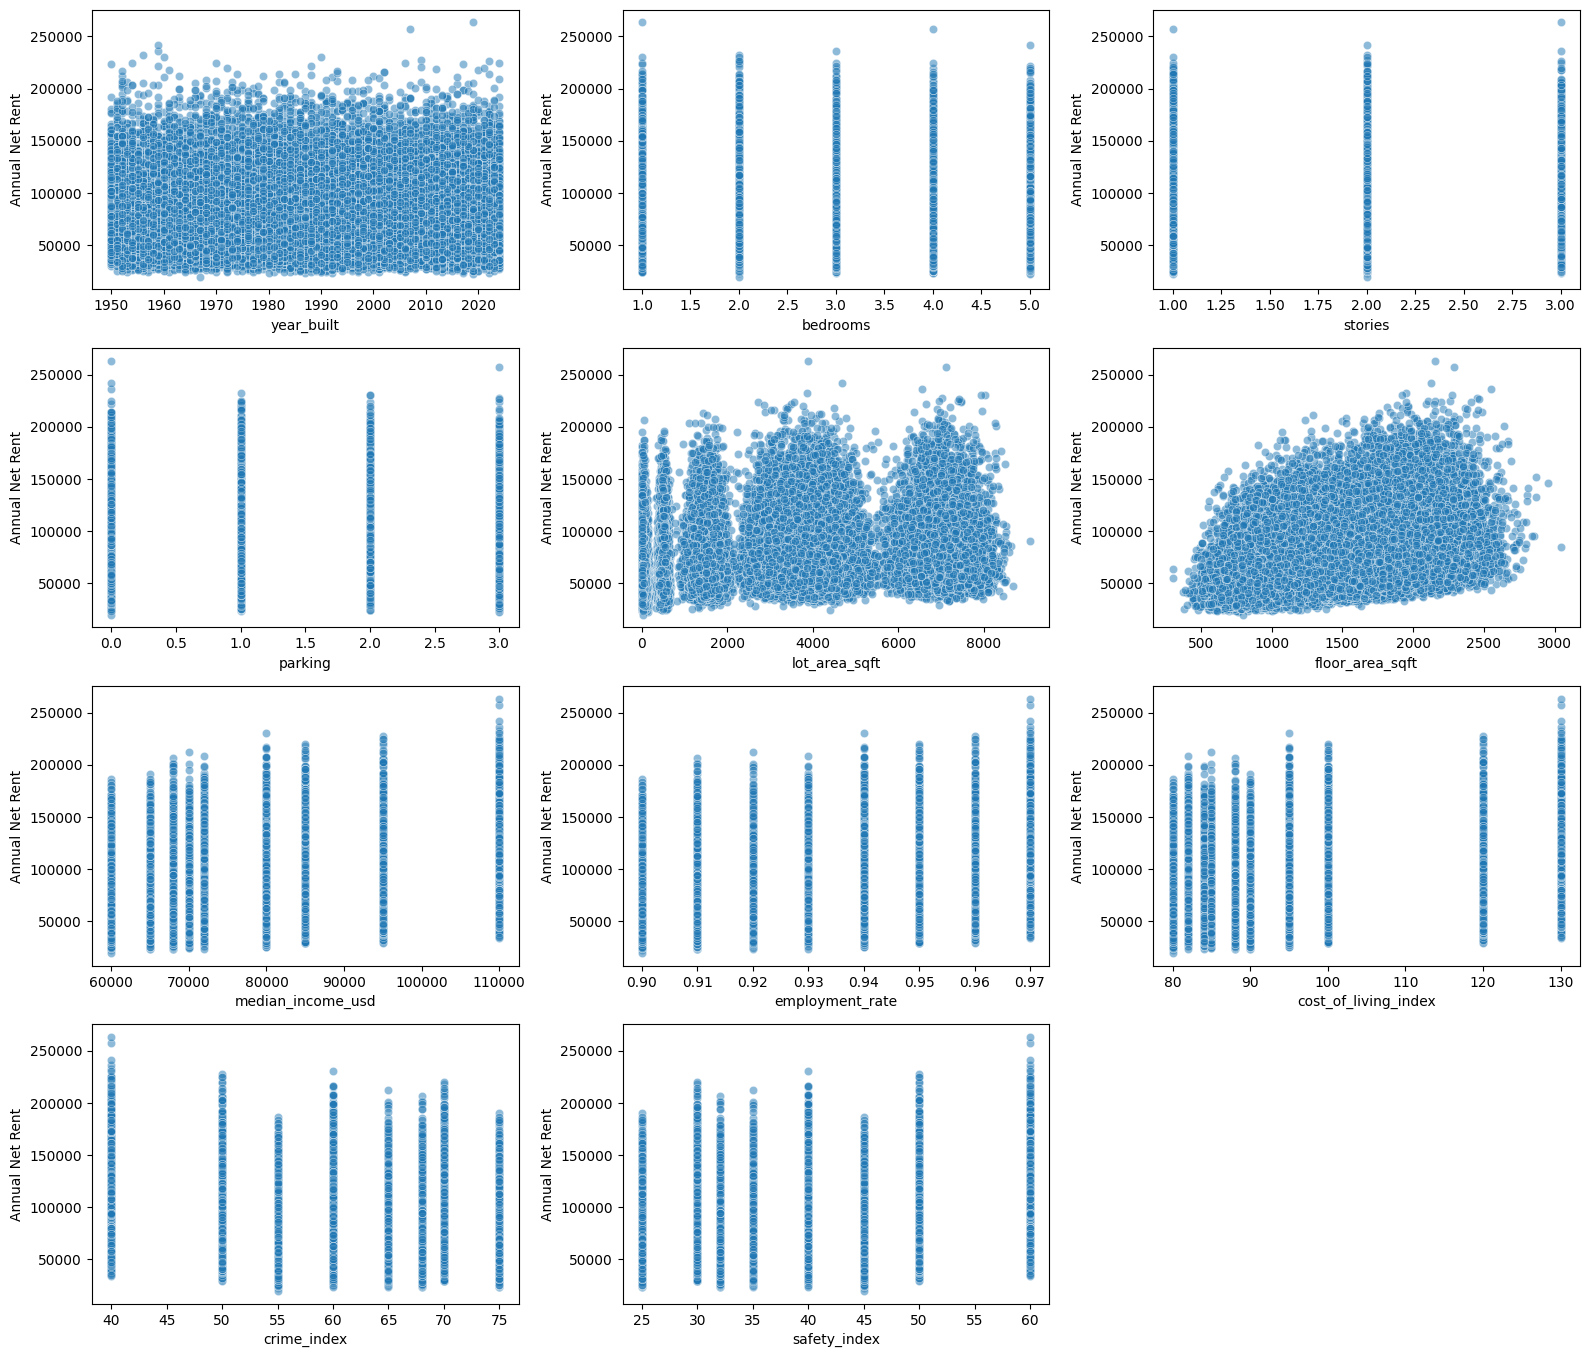

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric variables to compare with annual_net_rent
numeric_vars = [
    'year_built', 'bedrooms', 'stories', 'parking', 
    'lot_area_sqft', 'floor_area_sqft', 'median_income_usd', 
    'employment_rate', 'cost_of_living_index', 
    'crime_index', 'safety_index'
]

# Scatter plots of annual_net_rent vs each numeric variable
plt.figure(figsize=(16, 20))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(6, 3, i)
    sns.scatterplot(data=df1, x=var, y='annual_net_rent', alpha=0.5)
    plt.xlabel(var)
    plt.ylabel('Annual Net Rent')
    plt.tight_layout()

plt.show()
